# Fertile man semen parameters 2020 -WHO


## Creando un data frame

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import kstest
from scipy.stats import anderson
import fitter
from fitter import Fitter, get_common_distributions, get_distributions
import seaborn as sns

In [2]:
#Creamos el dataframe
df = pd.read_csv('Fertile_Man_WHO_2020.csv')
df

,Publisher,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
0,Aboutorabi,3.2,27.0,86.4,35.0,20.0,15.0,65.0,NaN,NaN
1,Aboutorabi,0.8,136.0,108.8,47.0,35.0,12.0,53.0,NaN,NaN
2,Aboutorabi,2.0,71.0,142.0,49.0,42.0,7.0,51.0,NaN,NaN
3,Aboutorabi,1.0,35.0,35.0,50.0,28.0,22.0,50.0,NaN,NaN
4,Aboutorabi,2.0,46.0,92.0,51.0,28.0,33.0,49.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3584,Tang,1.7,23.0,39.1,53.0,52.0,1.0,NaN,82.0,25.0
3585,Tang,2.5,110.0,275.0,66.0,66.0,0.0,NaN,95.0,30.0
3586,Tang,2.0,109.0,218.0,64.0,44.0,20.0,36.0,NaN,11.0
3587,Tang,6.2,96.0,595.2,39.0,29.0,10.0,61.0,NaN,7.0


In [3]:
#Obtenemos la informacion general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Publisher                 3589 non-null   object 
 1   Semen_Volume              3586 non-null   float64
 2   Sperm_Concentration       3587 non-null   float64
 3   Total_Number              3584 non-null   float64
 4   Total_Motility            3488 non-null   float64
 5   Progressive_Motility      3389 non-null   float64
 6   Non-progressive_Motility  3387 non-null   float64
 7   Immotile_Spermatozoa      2800 non-null   float64
 8   Vitality                  1337 non-null   float64
 9   Normal_Forms              3335 non-null   float64
dtypes: float64(9), object(1)
memory usage: 280.5+ KB


### Optamos por eliminar la columna de Vitality puesto que tiene un alto número de nulos 

In [4]:
df = df.drop(columns = 'Vitality')

## Optamos por llenar los valores nulos dentro de la columna Immotile_Spermatozoa con los valores que ya tenemos de Total_Motility y lo obtenemos a partir del despeje de la formula 
### 100 = Immotile_Spermatozoa + Total_Motility 
## Lo que nos deja el despeje: Immotile_Spermatozoa = Total_Motility - 100


In [5]:
#probamos cuando tenemos total_motility y no contamos con Immotile_Spermatoza
df['Immotile_Spermatozoa'] = df['Immotile_Spermatozoa'].fillna(100-df['Total_Motility'])
#probamos cuando tenemos Immotile_Spermatoza y no contamos con total_motility. Despejando la formula
df['Total_Motility'] = df['Total_Motility'].fillna(100-df['Immotile_Spermatozoa'])
df

,Publisher,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Normal_Forms
0,Aboutorabi,3.2,27.0,86.4,35.0,20.0,15.0,65.0,NaN
1,Aboutorabi,0.8,136.0,108.8,47.0,35.0,12.0,53.0,NaN
2,Aboutorabi,2.0,71.0,142.0,49.0,42.0,7.0,51.0,NaN
3,Aboutorabi,1.0,35.0,35.0,50.0,28.0,22.0,50.0,NaN
4,Aboutorabi,2.0,46.0,92.0,51.0,28.0,33.0,49.0,NaN
...,...,...,...,...,...,...,...,...,...
3584,Tang,1.7,23.0,39.1,53.0,52.0,1.0,47.0,25.0
3585,Tang,2.5,110.0,275.0,66.0,66.0,0.0,34.0,30.0
3586,Tang,2.0,109.0,218.0,64.0,44.0,20.0,36.0,11.0
3587,Tang,6.2,96.0,595.2,39.0,29.0,10.0,61.0,7.0


### Observamos que pudimos aumentar el valor de registros sin nulos en las columnas anteriores. Ahora contamos on 3489 registros en dichas columnas 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Publisher                 3589 non-null   object 
 1   Semen_Volume              3586 non-null   float64
 2   Sperm_Concentration       3587 non-null   float64
 3   Total_Number              3584 non-null   float64
 4   Total_Motility            3489 non-null   float64
 5   Progressive_Motility      3389 non-null   float64
 6   Non-progressive_Motility  3387 non-null   float64
 7   Immotile_Spermatozoa      3489 non-null   float64
 8   Normal_Forms              3335 non-null   float64
dtypes: float64(8), object(1)
memory usage: 252.5+ KB


### Recuperamos los valores de Progressive Motility y Non-progressive Motility pues sabemos que 
### Total_Motility = Progressive_Motility + Non-progressive_Motility
### con el despeje de la formula podemos obtener valores de progressive y non-progressive motility

In [7]:
df['Progressive_Motility'] = df['Progressive_Motility'].fillna(df['Total_Motility']-df['Non-progressive_Motility'])
df['Non-progressive_Motility'] = df['Non-progressive_Motility'].fillna(df['Total_Motility']-df['Progressive_Motility'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Publisher                 3589 non-null   object 
 1   Semen_Volume              3586 non-null   float64
 2   Sperm_Concentration       3587 non-null   float64
 3   Total_Number              3584 non-null   float64
 4   Total_Motility            3489 non-null   float64
 5   Progressive_Motility      3389 non-null   float64
 6   Non-progressive_Motility  3389 non-null   float64
 7   Immotile_Spermatozoa      3489 non-null   float64
 8   Normal_Forms              3335 non-null   float64
dtypes: float64(8), object(1)
memory usage: 252.5+ KB


In [9]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132 entries, 169 to 3588
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Publisher                 3132 non-null   object 
 1   Semen_Volume              3132 non-null   float64
 2   Sperm_Concentration       3132 non-null   float64
 3   Total_Number              3132 non-null   float64
 4   Total_Motility            3132 non-null   float64
 5   Progressive_Motility      3132 non-null   float64
 6   Non-progressive_Motility  3132 non-null   float64
 7   Immotile_Spermatozoa      3132 non-null   float64
 8   Normal_Forms              3132 non-null   float64
dtypes: float64(8), object(1)
memory usage: 244.7+ KB


### Despues de llenar valores nulos con las formulas indicadas, eliminamos los registros en los cuales siguen existiendo valores nulos. El valor final de registros disponibles es de 3132.

## Fase 1: Exploracion 

### Histograma de Normal_Forms para comprobar que ningun registro cuenta con un porcentaje debajo de 4%.

1758     0.5
1674     0.5
2810     1.0
634      1.0
1666     1.0
        ... 
973     54.0
423     56.0
1102    58.0
2865    70.0
2549    76.0
Name: Normal_Forms, Length: 3132, dtype: float64

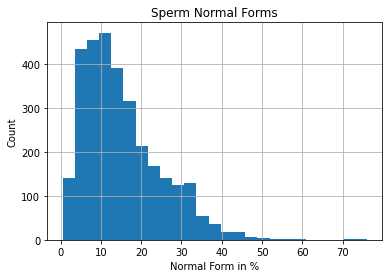

In [10]:
df['Normal_Forms'].hist(bins=25)
plt.title('Sperm Normal Forms')
plt.xlabel('Normal Form in %')
plt.ylabel('Count')
df['Normal_Forms'].sort_values(ascending=True)

### Histograma de Sperm_concentration para comprobar que ningun registro cuenta con un porcentaje debajo de 15 millones de espermatozoides por mililitro.

263       1.0
212       1.0
169       2.0
267       2.0
476       2.0
        ...  
3294    448.0
3528    480.0
1144    489.0
1016    528.0
1026    532.0
Name: Sperm_Concentration, Length: 3132, dtype: float64

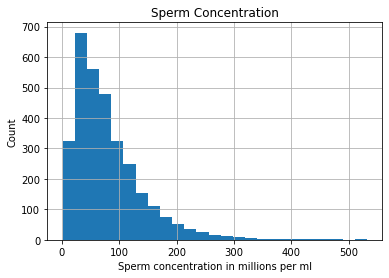

In [11]:
df['Sperm_Concentration'].hist(bins=25)
plt.title('Sperm Concentration')
plt.xlabel('Sperm concentration in millions per ml')
plt.ylabel('Count')
df['Sperm_Concentration'].sort_values()

### Grafica de Progressive Motility vs Total Motility para comprobar que son variables directamente proporcional

Text(0, 0.5, 'Total Motility')

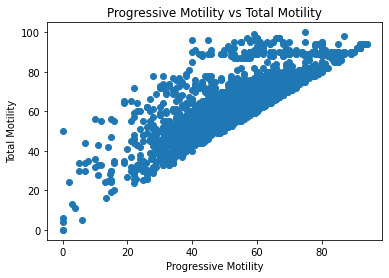

In [12]:
plt.scatter(df["Progressive_Motility"], df["Total_Motility"])
plt.title('Progressive Motility vs Total Motility')
plt.xlabel('Progressive Motility')
plt.ylabel('Total Motility')

## Fase 2: Analisis

#### Total Motility

Text(0, 0.5, 'Count')

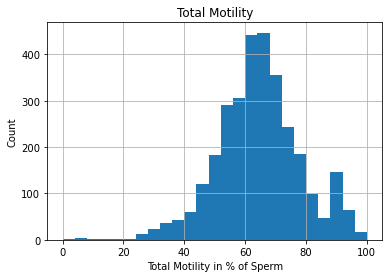

In [13]:
df['Total_Motility'].hist(bins=25)
plt.title('Total Motility')
plt.xlabel('Total Motility in % of Sperm')
plt.ylabel('Count')

In [14]:
df_descrp = pd.DataFrame() # crear un dataframe para agregar estadisticas descriptivas
df_descrp['Variable'] = ["Total_Motility"]
df_descrp['Media'] = [df["Total_Motility"].mean()]
df_descrp['Varianza'] = [df["Total_Motility"].var()]
df_descrp['Desviacion estandar'] = [df["Total_Motility"].std()]
df_descrp['Curtosis'] = [df["Total_Motility"].kurtosis()]
df_descrp['Simetria'] = [df["Total_Motility"].skew()]
df_descrp

,Variable,Media,Varianza,Desviacion estandar,Curtosis,Simetria
0,Total_Motility,64.013489,186.818155,13.668144,0.76701,-0.152804


In [15]:
#ejecutar prueba Kolmogorov-Smirnov para verificar si tiene distribucion normal
kstest(df['Total_Motility'], 'norm')

KstestResult(statistic=0.9993297591540801, pvalue=0.0)

### Con un valor p de 0.0 menor a 0.05 tenemos suficiente evidencia para rechazar la hipotesis nula y concluir que no contamos con una distribucion normal.

In [16]:
#prueba de anderson darling para verificar normalidad de los datos 
anderson(df['Total_Motility'], 'norm')

AndersonResult(statistic=9.725964775512693, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### Los resultados son significantes para todos los valores de alfa (0.15, 0.10, 0.05, 0.025,0.001) puesto que 9.73 es mayor para todos los valores criticos correspondientes

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:01<00:00,  2.67it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.002509,1273.211695,-43940.750875,inf,0.052460,6.239922e-08
norm,0.002512,1262.084462,-43945.402750,inf,0.051936,8.795071e-08
gamma,0.002536,1293.235330,-43907.535642,inf,0.049725,3.605219e-07
beta,0.002553,1228.524548,-43877.757464,inf,0.057593,1.798351e-09
burr,0.004461,1741.213937,-42130.253245,inf,0.103940,6.484305e-30


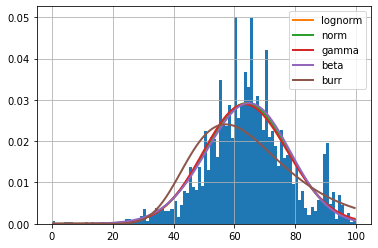

In [17]:
f = Fitter(df['Total_Motility'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [18]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.0073334852678949534,
  'loc': -1800.722131376814,
  'scale': 1864.7418215376874}}

In [19]:
from scipy.stats import lognorm
import numpy as np
# Mean of normal distribution
mu = df["Total_Motility"].mean()
# Standard Deviation of normal distribution
sigma = df["Total_Motility"].std()

mean, var, *rest = lognorm.stats(sigma, moments='mvsk', scale=np.exp(mu))
print('media',mean)
print('varianza',var)
print('std',var*var)

media 2.332126977011592e+68
varianza 7.40625053775979e+217
std inf


### Datos Atipicos

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbd740c3bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbd740d0310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbd740c3820>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbd740d0a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbd740d0df0>],
 'means': []}

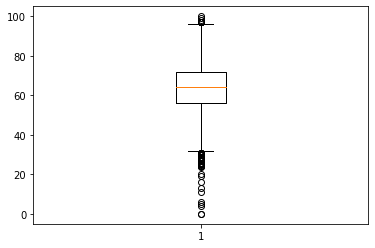

In [20]:
plt.boxplot(df['Total_Motility'])

In [21]:
## Matriz de correlacion 

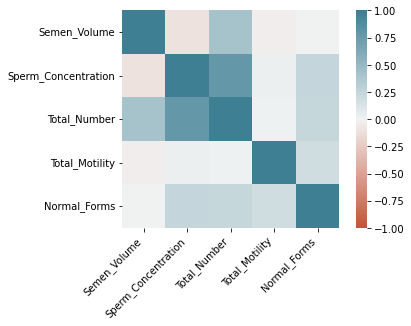

In [22]:
df1 = df.drop(columns = ['Progressive_Motility','Non-progressive_Motility','Immotile_Spermatozoa'])
corr = df1.corr() #obtener la matriz de correlacion  
ax = sns.heatmap( #utilizar un mapa de calor con seaborn
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [23]:
df1.corr()

,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Normal_Forms
Semen_Volume,1.000000,-0.100055,0.407804,-0.025435,0.005263
Sperm_Concentration,-0.100055,1.000000,0.776720,0.024323,0.247065
Total_Number,0.407804,0.776720,1.000000,0.011781,0.234667
Total_Motility,-0.025435,0.024323,0.011781,1.000000,0.180157
Normal_Forms,0.005263,0.247065,0.234667,0.180157,1.000000


## Fase 3: Modelacion 

### Variable critica: Normal_forms

In [24]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Datos
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'
datos = pd.read_csv(url)
datos.head(3)

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0


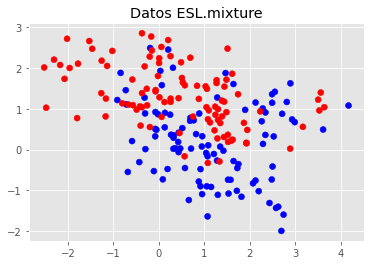

In [26]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.X1, datos.X2, c=datos.y);
ax.set_title("Datos ESL.mixture");

In [27]:
x = df.drop(columns = ['Normal_Forms','Publisher'])
y = df['Normal_Forms']
x_train, x_test, y_train, y_test = train_test_split(
                     x, y, test_size=0.80, random_state=42)

In [28]:
x_train

,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa
2562,2.50,25.0,62.500,94.000000,80.000000,14.000000,6.000000
317,3.70,68.0,252.000,52.000000,48.000000,4.000000,49.000000
1591,3.90,45.5,177.450,65.000000,54.000000,11.000000,35.000000
1183,3.90,56.0,218.400,73.000000,67.000000,6.000000,27.000000
1178,4.70,78.0,366.600,71.000000,68.000000,3.000000,29.000000
...,...,...,...,...,...,...,...
3549,1.30,116.0,150.800,75.000000,55.000000,20.000000,25.000000
1347,3.20,37.0,118.400,72.000000,53.000000,19.000000,28.000000
1581,3.10,48.0,148.800,75.000000,66.000000,9.000000,25.000000
1745,2.68,67.4,180.632,48.765432,41.666667,7.098765,51.234568


In [29]:

    model = SVR()
    model.fit(x_train, y_train)
    print(model)

SVR()


In [30]:
expected_y  = y_test
predicted_y = model.predict(x_test)

0.0012069183713797615
0.356442745914234


<AxesSubplot:xlabel='Normal_Forms'>

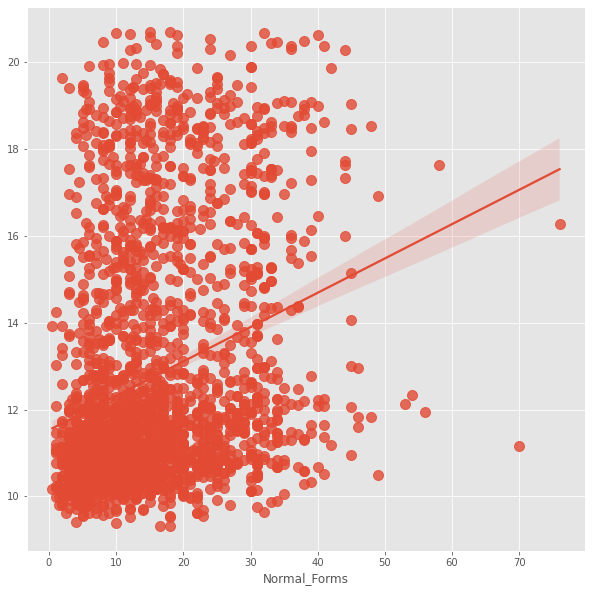

In [31]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

## Fase 4: Simulacion 

### Con base en la distribucion lognormal de la variable Total_Motility

In [58]:
mu, sigma = 74.3394, 237.1323
normal_std = np.sqrt(np.log(1 + (sigma/mu)**2))
normal_mean = np.log(mu) - normal_std**2 / 2
hs = np.random.lognormal(normal_mean, normal_std, 1000)
print(hs.max())    # some finite number
print(hs.mean())   # about 136519
print(hs.std())    # about 50405

7532.709195309964
88.97092132708566
364.8447960258794
1.5536079984683986


In [83]:
s = []
while len(s) != 3132:
    x = np.random.lognormal(normal_mean, normal_std, 1)
    if x <= 100:
        s.append(x[0])
min(s)

0.16229500576483527

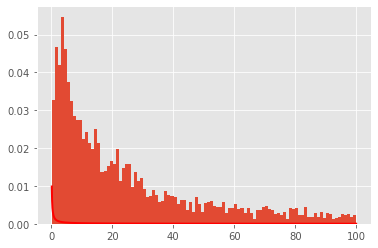

In [84]:
count, bins, ignored = plt.hist(s, 100, density=True, align='mid')
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

In [70]:
x = np.random.lognormal(normal_mean, normal_std, 1)
print(x[0])

386.17195724898886
